In [48]:
import adaptive
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from scipy import sparse
from scipy.sparse import linalg as sla
from tqdm.notebook import tqdm
from usadel import (
    Grad,
    Laplacian1D,
    gen_assemble_fun,
    solve_usadel,
    solve_usadel_self_consistent,
)

In [49]:
plt.style.use("sans_style.mplstyle")

# 1D

In [113]:
Nx = 400
x = np.linspace(-10, 10, Nx)
dx = x[1] - x[0]

h_x = np.zeros((Nx), dtype=float)
h_y = np.zeros((Nx), dtype=float)

# h_x[: Nx // 2] = 0
# h_x[Nx // 2 :] = 2

# L_dw = 1
# h_s = 1.35 
# h_x = h_s * np.tanh(x / L_dw)
# h_y = h_s * 1 / np.cosh(x / L_dw)

L_dw = 0.87
h_s = 1.4#35 
h_x = h_s * np.cos(x / L_dw)
h_y = h_s * np.sin(x / L_dw)

In [114]:
T_c0 = 1
Delta_00 = T_c0 * 1.7652
h_c0 = Delta_00 / np.sqrt(2)

D = 1**2 * Delta_00
xi_00 = np.sqrt(D / Delta_00)

In [115]:
tau_so_inv = 0.0
tau_sf_inv = 0.0

In [116]:
D_x = Grad(Nx) / (2 * dx) 
L = Laplacian1D(Nx, "open") / dx ** 2 

# L = np.array([[0, 0], [0, 0]])
# D_x = np.array([[0, 0], [0, 0]])
# D = 0

assemble_fun = gen_assemble_fun(D, L, D_x, tau_so_inv, tau_sf_inv)

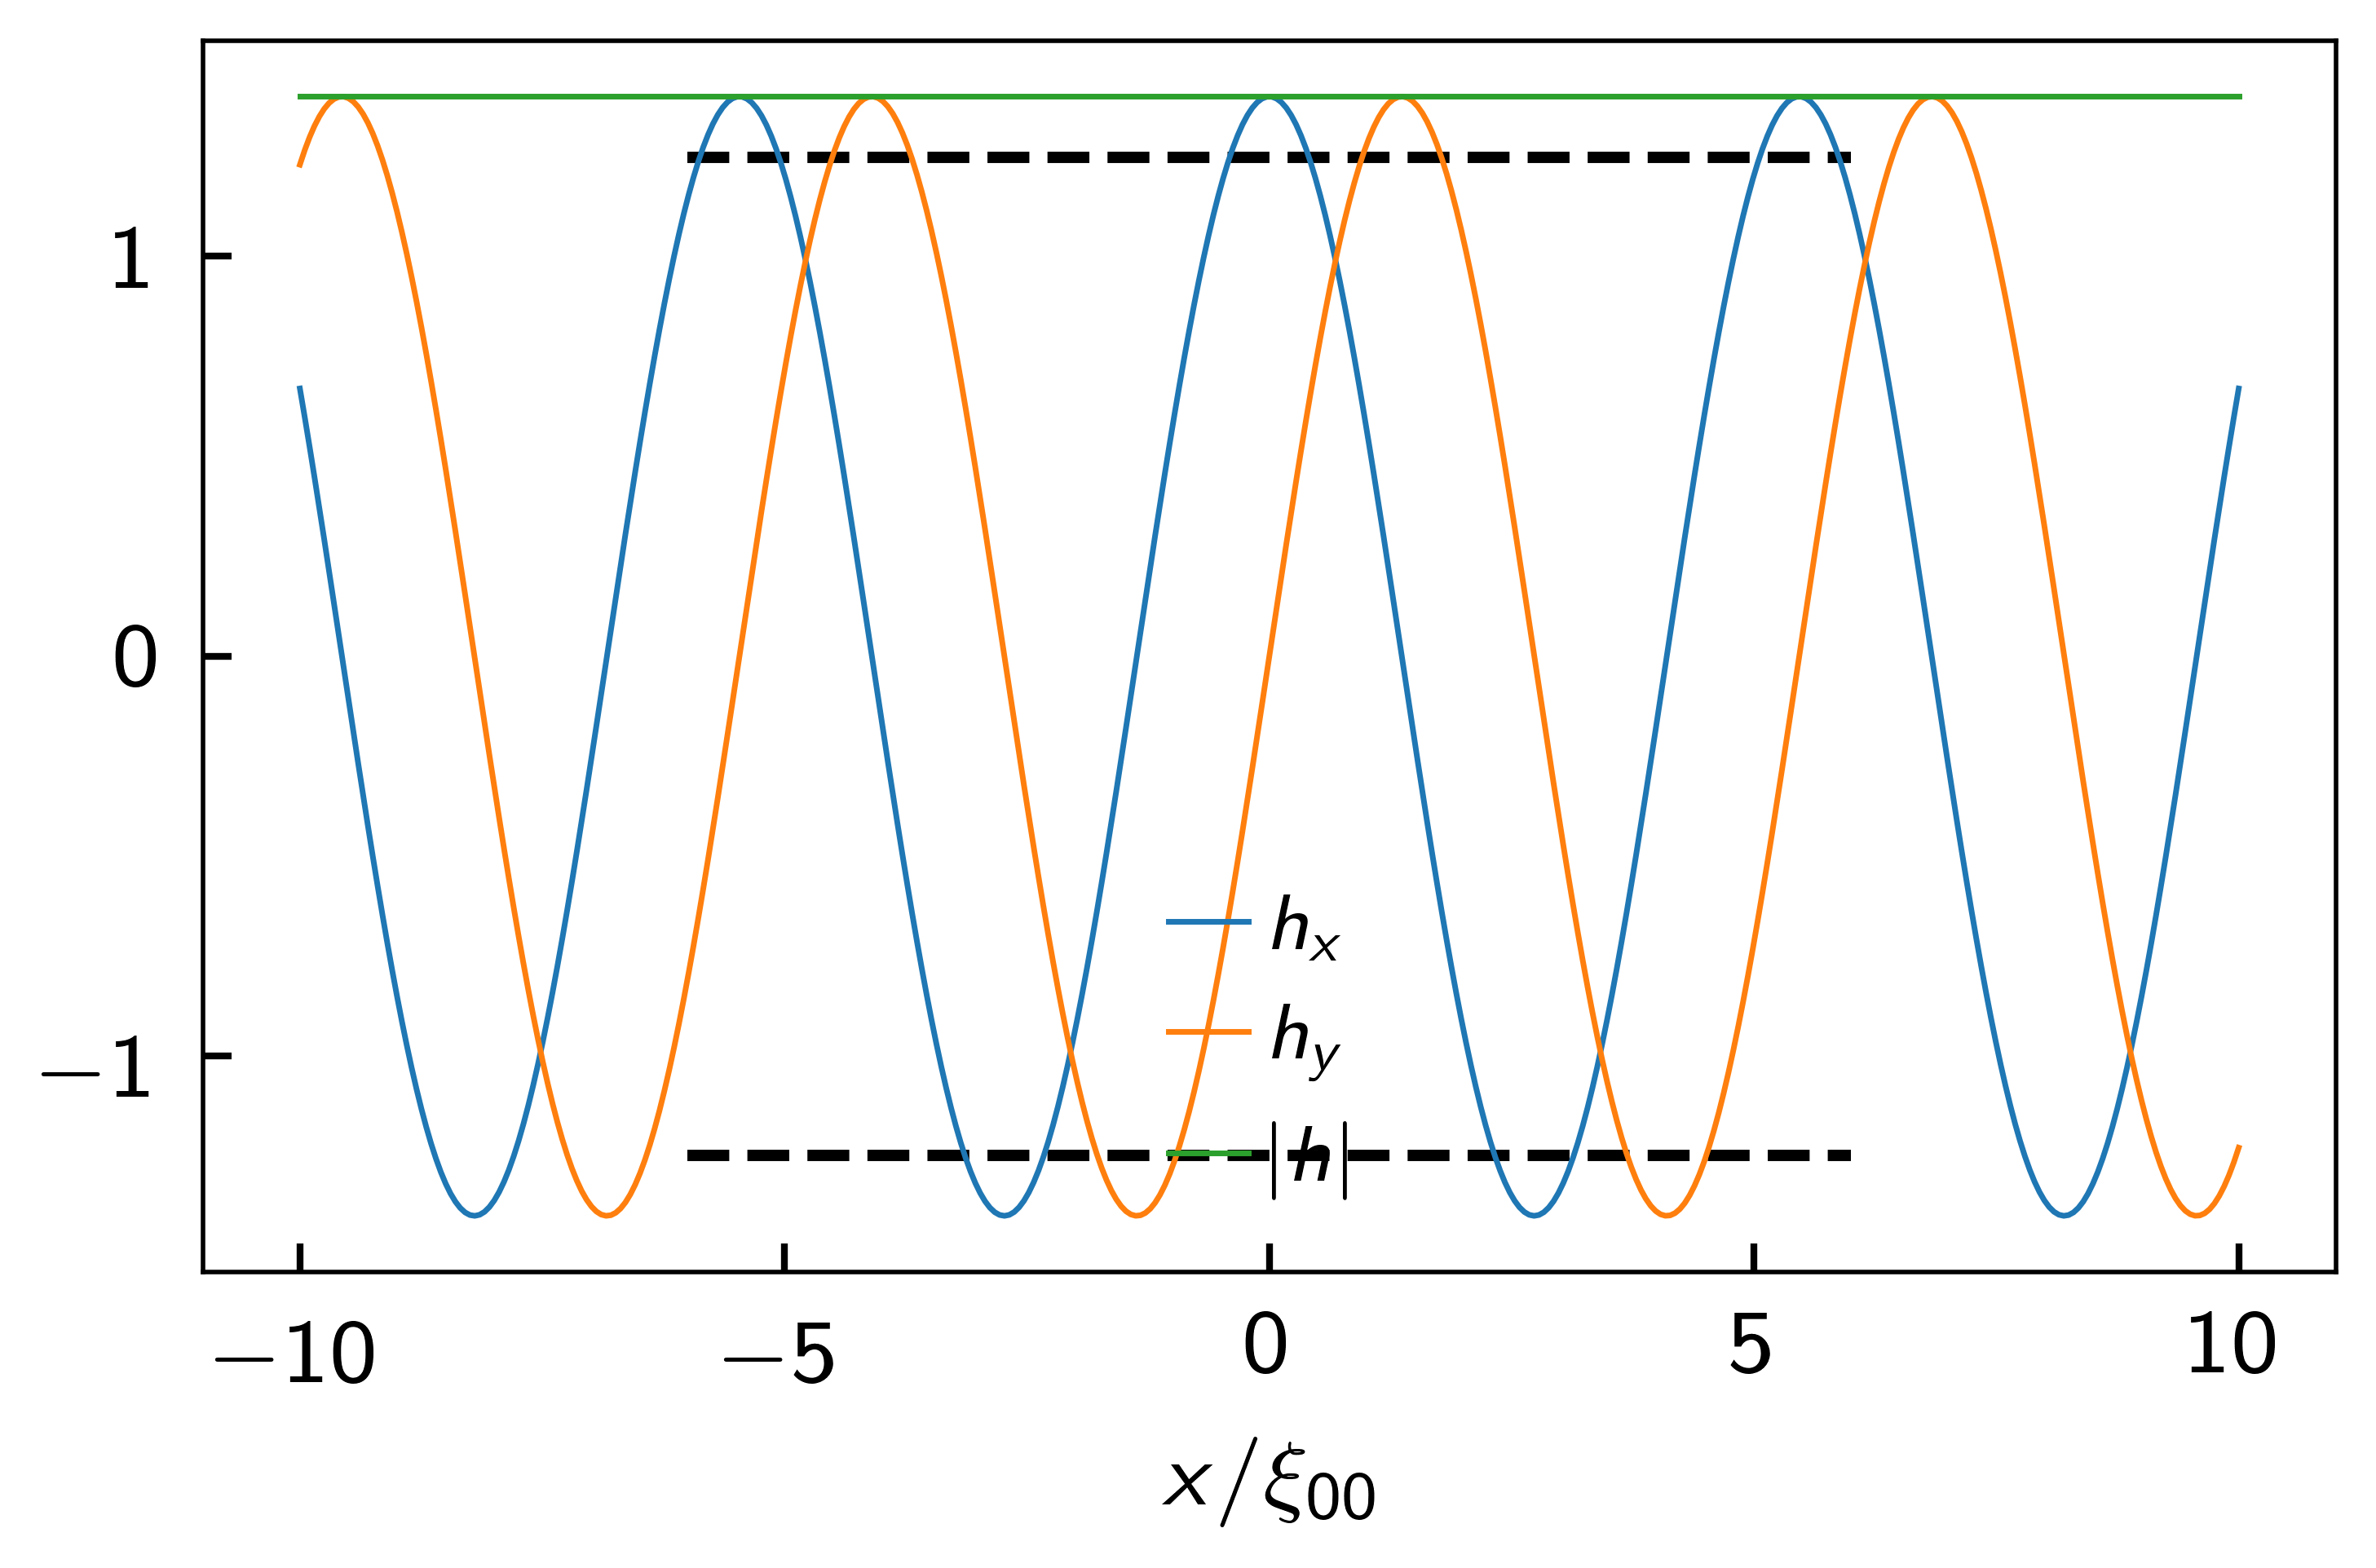

In [117]:
fig, ax = plt.subplots()
ax.hlines([h_c0, -h_c0], -6, 6, colors="k", linestyles="--", linewidth=1)
ax.plot(x/xi_00, h_x, '-', label=r"$h_x$")
ax.plot(x/xi_00, h_y, '-', label=r"$h_y$")
ax.plot(x/xi_00, np.sqrt(h_x**2+h_y**2), '-', label=r"$|h|$")
ax.set_xlabel(r"$x / \xi_{00}$")
ax.legend()

In [15]:
a_ax

array([-0.3125    , -0.30208333, -0.29166667, -0.28125   , -0.27083333,
       -0.26041667, -0.25      , -0.23958333, -0.22916667, -0.21875   ,
       -0.20833333, -0.19791667, -0.1875    , -0.17708333, -0.16666667,
       -0.15625   , -0.14583333, -0.13541667, -0.125     , -0.11458333,
       -0.10416667, -0.09375   , -0.08333333, -0.07291667, -0.0625    ,
       -0.05208333, -0.04166667, -0.03125   , -0.02083333, -0.01041667,
        0.        ,  0.01041667,  0.02083333,  0.03125   ,  0.04166667,
        0.05208333,  0.0625    ,  0.07291667,  0.08333333,  0.09375   ,
        0.10416667,  0.11458333,  0.125     ,  0.13541667,  0.14583333,
        0.15625   ,  0.16666667,  0.17708333,  0.1875    ,  0.19791667,
        0.20833333,  0.21875   ,  0.22916667,  0.23958333,  0.25      ,
        0.26041667,  0.27083333,  0.28125   ,  0.29166667,  0.30208333,
        0.3125    ])

In [15]:
a_ax

array([-0.3125    , -0.30208333, -0.29166667, -0.28125   , -0.27083333,
       -0.26041667, -0.25      , -0.23958333, -0.22916667, -0.21875   ,
       -0.20833333, -0.19791667, -0.1875    , -0.17708333, -0.16666667,
       -0.15625   , -0.14583333, -0.13541667, -0.125     , -0.11458333,
       -0.10416667, -0.09375   , -0.08333333, -0.07291667, -0.0625    ,
       -0.05208333, -0.04166667, -0.03125   , -0.02083333, -0.01041667,
        0.        ,  0.01041667,  0.02083333,  0.03125   ,  0.04166667,
        0.05208333,  0.0625    ,  0.07291667,  0.08333333,  0.09375   ,
        0.10416667,  0.11458333,  0.125     ,  0.13541667,  0.14583333,
        0.15625   ,  0.16666667,  0.17708333,  0.1875    ,  0.19791667,
        0.20833333,  0.21875   ,  0.22916667,  0.23958333,  0.25      ,
        0.26041667,  0.27083333,  0.28125   ,  0.29166667,  0.30208333,
        0.3125    ])

## Gap equation solver

In [118]:
T_c0 = 1
T = 0.2

Delta = np.zeros((Nx), dtype=float) + 1.5 # 1.7 # * (1 - np.abs(x / Nx))

In [120]:
(theta, M_x, M_y, Delta, omega_ax, f_sn) = solve_usadel_self_consistent(
    assemble_fun,
    h_x,
    h_y,
    Delta,
    T,
    omega_N=100,
    gamma=1,
    tol=1e-6,
    max_iter=300,
    max_iter_delta=300,
)

  1    Max Delta: 1.513    Residual: 2.81e-03    Free energy: 3.66e+01
  2    Max Delta: 1.523    Residual: 2.51e-03    Free energy: 3.66e+01
  3    Max Delta: 1.532    Residual: 2.24e-03    Free energy: 3.67e+01
  4    Max Delta: 1.539    Residual: 1.99e-03    Free energy: 3.67e+01
  5    Max Delta: 1.544    Residual: 1.78e-03    Free energy: 3.67e+01
  6    Max Delta: 1.549    Residual: 1.58e-03    Free energy: 3.68e+01
  7    Max Delta: 1.553    Residual: 1.40e-03    Free energy: 3.68e+01
  8    Max Delta: 1.557    Residual: 1.25e-03    Free energy: 3.68e+01
  9    Max Delta: 1.560    Residual: 1.11e-03    Free energy: 3.69e+01
 10    Max Delta: 1.562    Residual: 9.83e-04    Free energy: 3.69e+01
 11    Max Delta: 1.565    Residual: 8.72e-04    Free energy: 3.69e+01
 12    Max Delta: 1.566    Residual: 7.74e-04    Free energy: 3.69e+01
 13    Max Delta: 1.568    Residual: 6.86e-04    Free energy: 3.70e+01
 14    Max Delta: 1.570    Residual: 6.08e-04    Free energy: 3.70e+01
 15   

In [ ]:
cc_idx = np.argsort(np.abs(np.abs(h_x) - h_c0))

In [ ]:
x[cc_idx[0]]

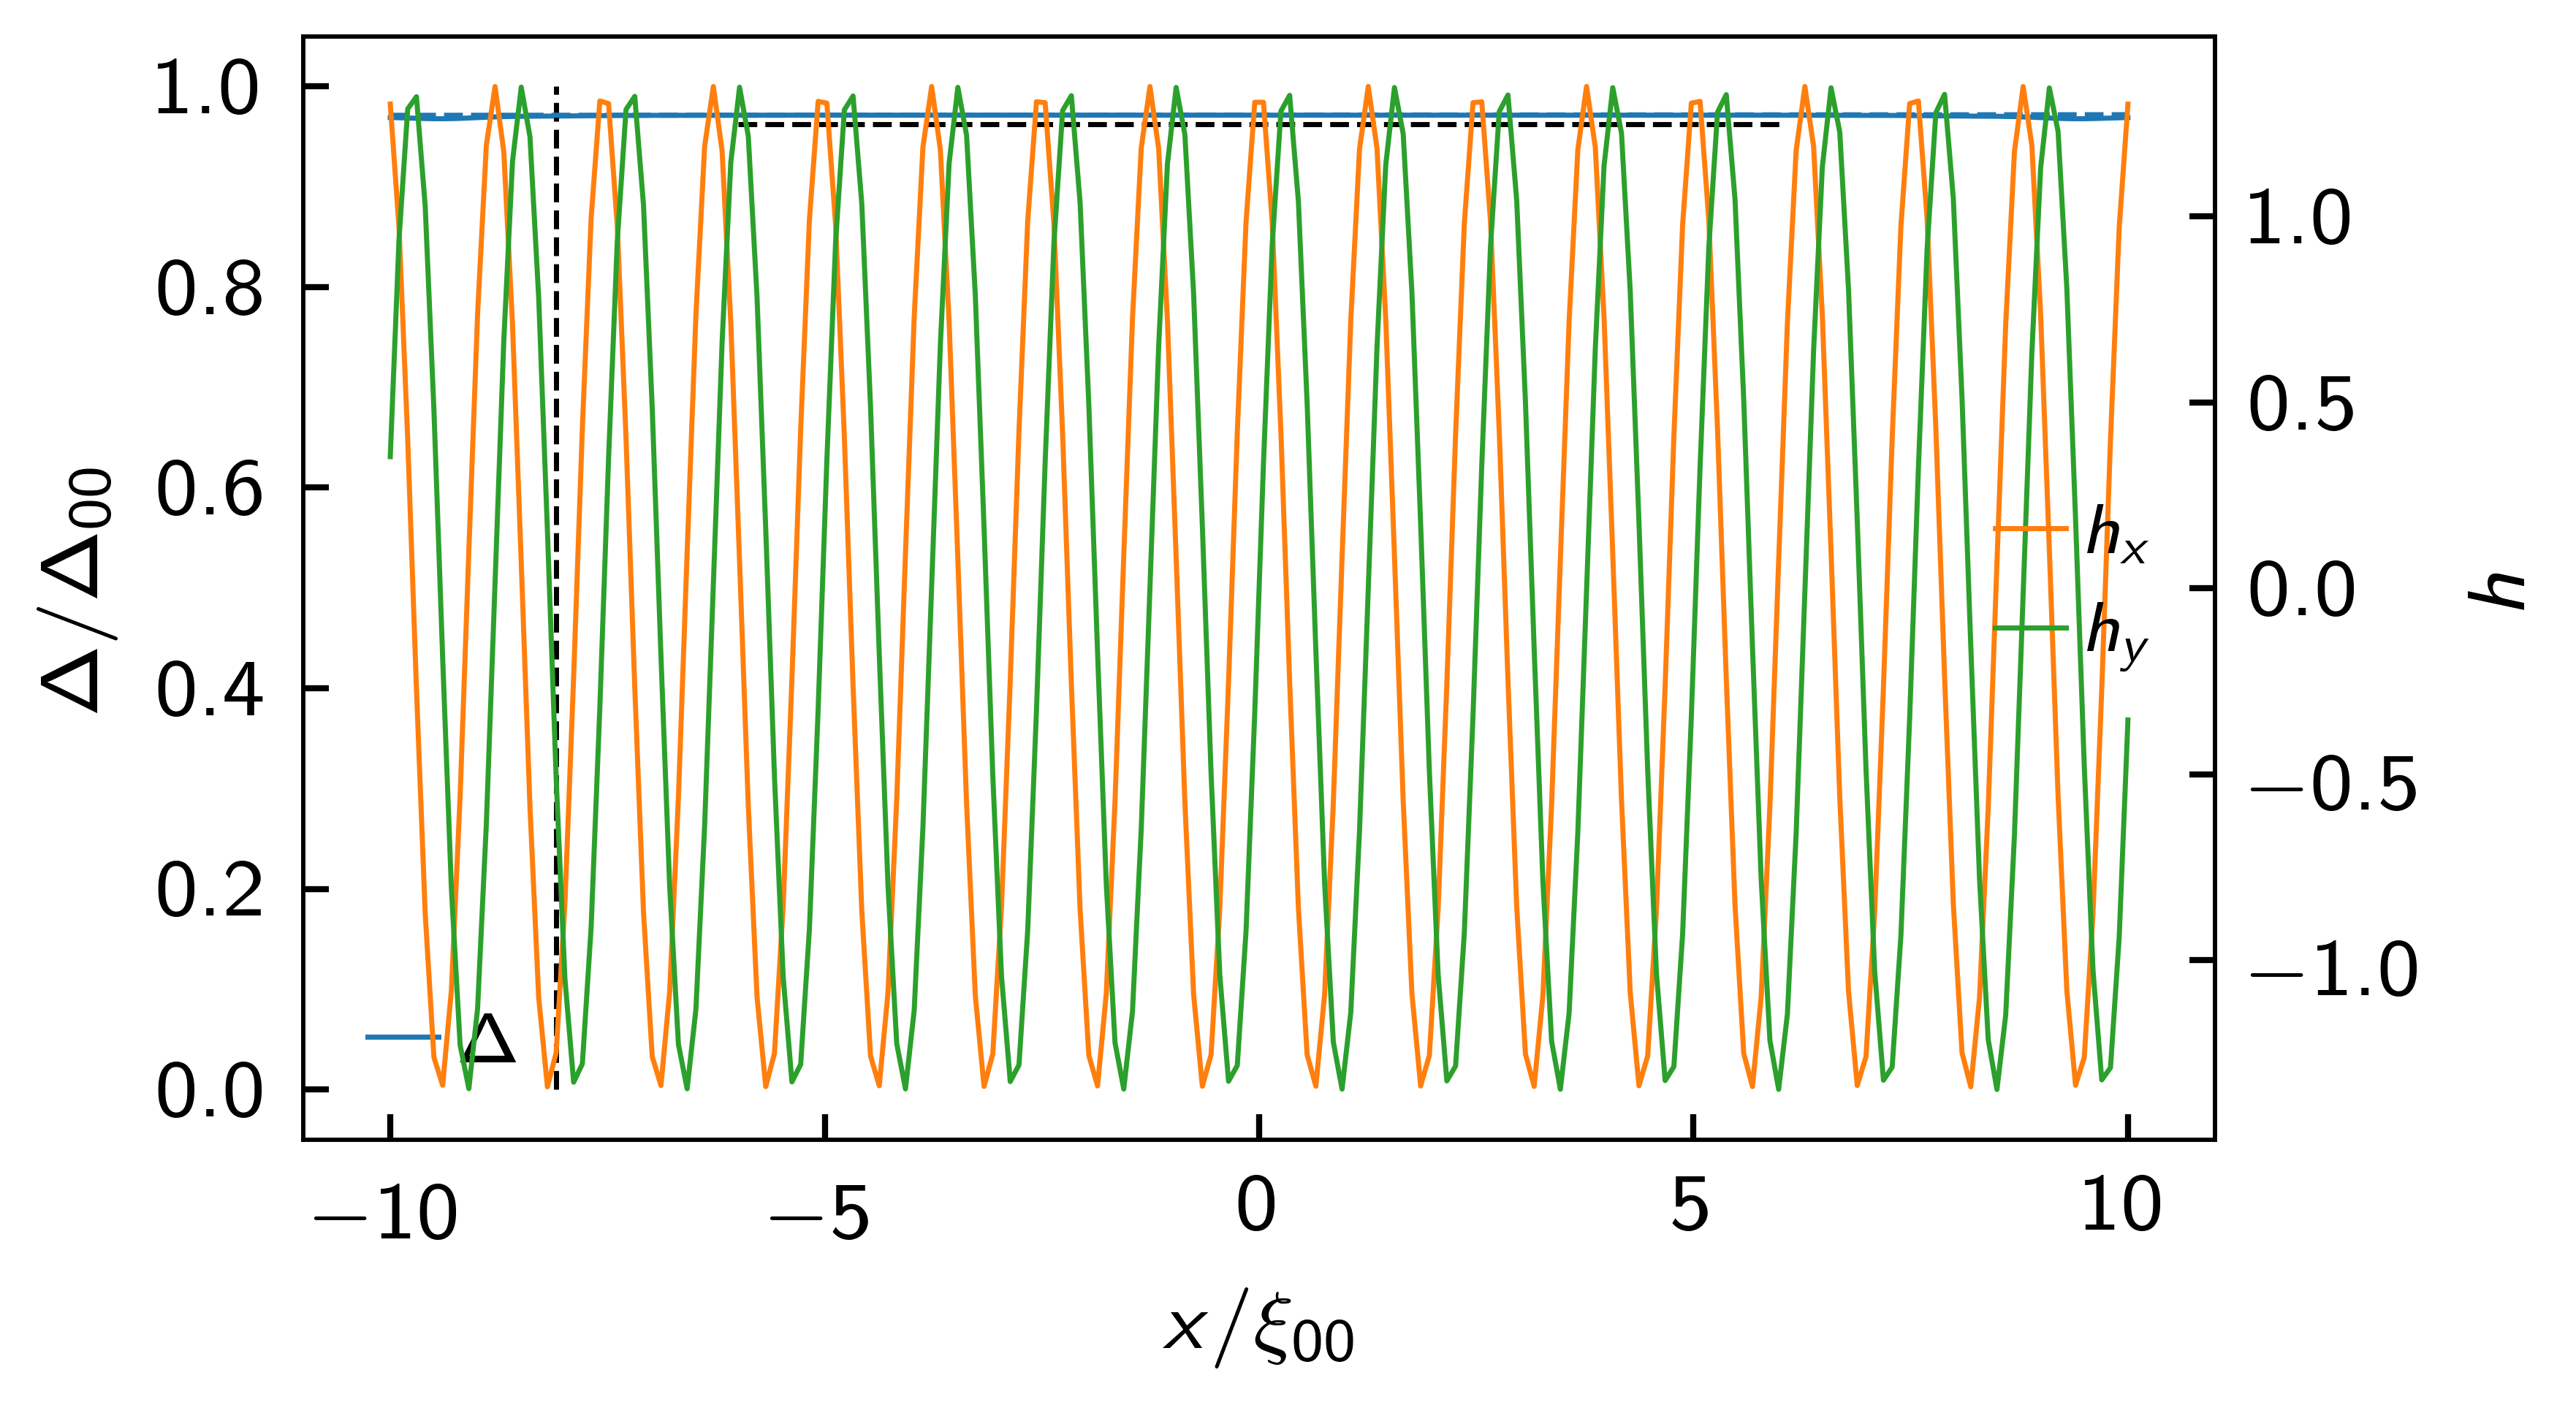

In [40]:
fig, ax = plt.subplots()
ax.plot(x/xi_00, Delta / Delta_00, "-C0", label=r"$\Delta$")
ax.set_ylabel(r"$\Delta / \Delta_{00}$")
ax.vlines(x[cc_idx[0]]/xi_00, 0, 1, colors="k", linestyles="--", linewidth=0.5)
#ax.vlines([x[cc_idx[1]]/xi_00], 0, 1, colors="-k", linestyles="--", linewidth=1)
ax.plot(x/xi_00, Delta[50]/Delta_00 + (np.diff(Delta/Delta_00)/(x[1]-x[0]))[50]*(x-x[50]), 'C0--')

ax.set_ylim(-0.05, 1.05)
ax.set_xlabel(r"$x/\xi_{00}$")

ax2 = ax.twinx()
ax2.hlines([+h_c0], -6, 6, colors="k", linestyles="--", linewidth=0.5)
#ax2.hlines([-h_c], -6, 6, colors="k", linestyles="--", linewidth=1)

ax2.plot(x/xi_00, h_x, "-C1", label=r"$h_x$")
ax2.plot(x/xi_00, h_y, "-C2", label=r"$h_y$")
ax2.set_ylabel(r"$h$")

ax.legend()
ax2.legend()

## Spectrum solver

In [ ]:
omega_N = 101
omega_ax = -1j * np.linspace(-3, 3, omega_N)

theta = np.ones((omega_N, Nsites), dtype=complex)
M_x = np.zeros((omega_N, Nsites), dtype=complex)
M_y = np.zeros((omega_N, Nsites), dtype=complex)

In [ ]:
for omega_idx in range(omega_N):
    solve_usadel(
        assemble_fun[:-1],
        theta,
        M_x,
        M_y,
        h_x,
        h_y,
        Delta,
        omega_ax,
        omega_idx,
        gamma=0.50,
        tol=1e-6,
        max_iter=200,
        print_exit_status=False,
    )

In [ ]:
h_x_2D = h_x.reshape((Ny, Nx))
h_y_2D = h_y.reshape((Ny, Nx))
Delta_2D = Delta.reshape((Ny, Nx))
M_x_2D = M_x.reshape((omega_N, Ny, Nx))
M_y_2D = M_y.reshape((omega_N, Ny, Nx))
theta_2D = theta.reshape((omega_N, Ny, Nx))

M_0_2D = np.sqrt(1 + M_x_2D ** 2 + M_y_2D ** 2)

In [ ]:
fig, ax = plt.subplots(ncols=6, figsize=(6, 2), sharey=True)

ax[0].plot(
    np.real((M_0_2D * np.cos(theta_2D))[:, 0, 0]), omega_ax.imag,
)
ax[1].plot(
    np.real((M_0_2D * np.cos(theta_2D))[:, 0, 20]), omega_ax.imag,
)
ax[2].plot(
    np.real((M_0_2D * np.cos(theta_2D))[:, 0, 40]), omega_ax.imag,
)
ax[3].plot(
    np.real((M_0_2D * np.cos(theta_2D))[:, 0, 60]), omega_ax.imag,
)

ax[4].plot(
    np.real((M_0_2D * np.cos(theta_2D))[:, 0, 80]), omega_ax.imag,
)

ax[5].plot(
    np.real((M_0_2D * np.cos(theta_2D))[:, 0, 100]), omega_ax.imag,
)

fig.tight_layout()

In [ ]:
DOS = np.real(M_0_2D * np.cos(theta_2D)) / 2
DOSp = (
    np.real(M_0_2D * np.cos(theta_2D) + 1j * (M_x_2D - 1j * M_y_2D) * np.sin(theta_2D))
    / 4
)
DOSm = (
    np.real(M_0_2D * np.cos(theta_2D) - 1j * (M_x_2D - 1j * M_y_2D) * np.sin(theta_2D))
    / 4
)

Fs = np.real(M_0_2D * np.sin(theta_2D))
Ftx = np.real(-1j * M_x_2D * np.cos(theta_2D))

x_idx = 10

fig, ax = plt.subplots(ncols=2, figsize=(6, 2), sharey=False)
ax[0].plot(omega_ax.imag, DOS[:, 0, x_idx], label=r"$\mathrm{DOS}$")
ax[0].plot(omega_ax.imag, DOSp[:, 0, x_idx], label=r"$\mathrm{DOS}_\uparrow$")
ax[0].plot(omega_ax.imag, DOSm[:, 0, x_idx], label=r"$\mathrm{DOS}_\downarrow$")
ax[1].plot(omega_ax.imag, Fs[:, 0, x_idx], label=r"$F_s$")
ax[1].plot(omega_ax.imag, Ftx[:, 0, x_idx], label=r"$F_{x}$")
ax[0].set_ylabel(r"$N/ N_0$")
ax[0].set_xlabel(r"$\omega$")
ax[1].set_xlabel(r"$\omega$")
ax[0].legend()
ax[1].legend()